In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
files = [file for file in os.listdir('./Sales_Data')]

df_all = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    df_all = pd.concat([df_all,df])

df_all.to_csv('All_data.csv',index = False)

In [3]:
df_all.dropna(how = 'all', inplace = True)

In [4]:
df_all = df_all[df_all['Order Date'].str[0:2] != 'Or']

In [5]:
df_all['Month'] = df_all['Order Date'].str[0:2]

In [6]:
df_all["Month"] = df_all['Month'].astype('int32')

In [7]:
df_all['Quantity Ordered'] = df_all['Quantity Ordered'].astype('int32')

df_all['Price Each'] = df_all['Price Each'].astype('float32')

In [8]:
df_all['Sales'] = df_all['Quantity Ordered'] * df_all['Price Each']

In [9]:
results = df_all.groupby('Month').sum()
df_all['Sales'].max()

3400.0

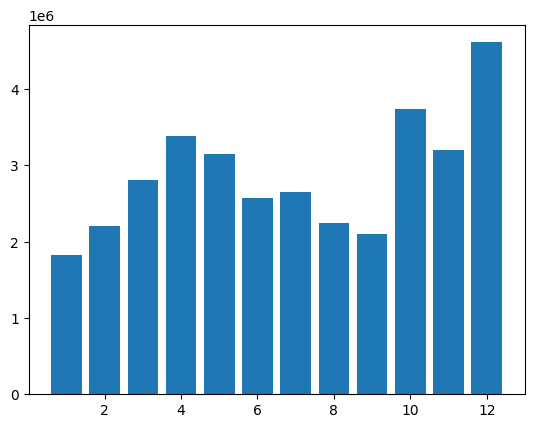

In [10]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results['Sales'])
plt.show()

In [11]:
df_all

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.970000
11682,259354,iPhone,1,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.000000
11683,259355,iPhone,1,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.000000
11684,259356,34in Ultrawide Monitor,1,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.989990


In [12]:
df_all['City'] = df_all['Purchase Address'].apply(lambda x: x.split(',')[1]) 


In [13]:
result = df_all.groupby('City').sum()

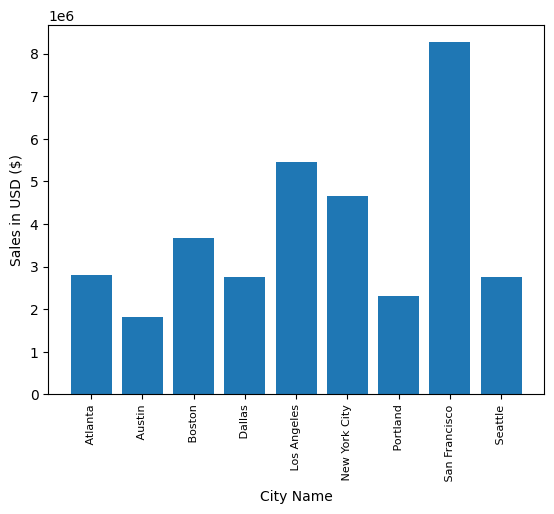

In [14]:

import matplotlib.pyplot as plt



cities = [city for city, df in df_all.groupby('City')]

plt.bar(cities,result['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

In [15]:
df_all['Order Date'] = pd.to_datetime(df_all["Order Date"])

C:\Users\afaqx\AppData\Local\Temp\ipykernel_12552\4270985184.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all['Order Date'] = pd.to_datetime(df_all["Order Date"])


In [20]:
df_all['Hour'] = df_all['Order Date'].dt.hour
df_all['Minutes'] = df_all['Order Date'].dt.minute

In [21]:
df_all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston,22,30
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles,14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles,14,38
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles,9,27


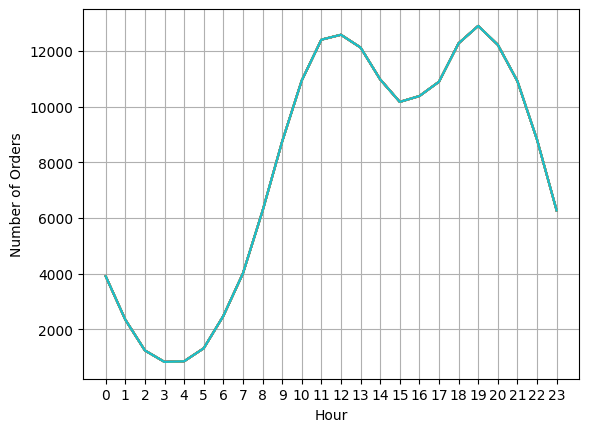

In [28]:
hours = [hour for hour, df in df_all.groupby('Hour')]

plt.plot(hours,df_all.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.show()

In [29]:
df_all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston,22,30
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles,14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles,14,38
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles,9,27


In [36]:
val = df_all['Order ID'].value_counts()

In [ ]:

orders = [order for order, df in df_all.groupby('Order ID')]

plt.bar(orders,val)
plt.show()